In [1]:
# Import required modules
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Reading csv file into dataframe
census_df = pd.read_csv('./Input_Dataset.csv')

In [3]:
# Displaying first five entries
census_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
print("Number of Observations in the dataset:", census_df.shape[0])

Number of Observations in the dataset: 48842


In [5]:
print("Number of parameters in the dataset:", census_df.shape[1])

Number of parameters in the dataset: 15


In [6]:
# The dataset has people whose age range from 17-90, with average age of around 38
# The educational background of people range from level 1 to 16
# The average education level is 10 years
# Minimum values of capital gain and loss both are 0
# The maximum capital gain is 99999 which is far from 75% quartile range, hence outlier
# The maximum capital loss has a value of 4356, which is also outlier
# The average hours of working per week are 40 hours
# The weekly hours range from 1-99 hours/week

census_df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
# Inspecting data and the type of features, 
# where int is numerical, and object can be said categorical variable

census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
# Displaying unique values per column
census_df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [9]:
# Filtering columns based on if numerical or categorical
categorical_cols = census_df.dtypes[census_df.dtypes == 'object']
numerical_cols = census_df.dtypes[census_df.dtypes != 'object']

In [10]:
# Displaying the values of unique values in all categorical columns
for col in list(categorical_cols.index):
    print(f'\n\n The {col.title()} column has following unique values: \n {census_df[col].unique()}')



 The Workclass column has following unique values: 
 ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


 The Education column has following unique values: 
 ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']


 The Marital-Status column has following unique values: 
 ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']


 The Occupation column has following unique values: 
 ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']


 The Relationship column has following unique values: 
 ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-rela

In [11]:
# Displaying the values of unique values in all numerical columns
for col in list(numerical_cols.index):
    print(f'\n\n The {col.title()} column has following unique values: \n {census_df[col].unique()}')



 The Age column has following unique values: 
 [25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]


 The Fnlwgt column has following unique values: 
 [226802  89814 336951 ... 129912 255835 257302]


 The Educational-Num column has following unique values: 
 [ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]


 The Capital-Gain column has following unique values: 
 [    0  7688  3103  6418  7298  3908 14084  5178 15024 99999  2597  2907
  4650  6497  1055  5013 27828  4934  4064  3674  2174 10605  3418   114
  2580  3411  4508  4386  8614 13550  6849  2463  3137  2885  2964  1471
 10566  2354  1424  1455  3325  4416 25236   594  2105  4787  2829   401
  4865  1264  1506 10520  3464  2653 20051  4101  1797  2407  3471  1086
  1848 14344  1151  2993  2290 15020  9386  2202  3818  2176  5455 11678
  7978  7262  651

In [12]:
# Replacing '?' with Nan
census_df = census_df.replace('?', np.nan)

In [13]:
# Finding the columns with (now updated from '?') Nan values
census_df.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [14]:
# Replacing all Nan values with mode of column, 
# as the columns with missing values were all categorical columns: workclass, occupation, native-country

for col in ['workclass', 'occupation', 'native-country']:
    census_df[col].fillna(census_df[col].mode()[0], inplace=True)

In [15]:
# Proof checking for Nan values
census_df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Text(0, 0.5, 'Frequency')

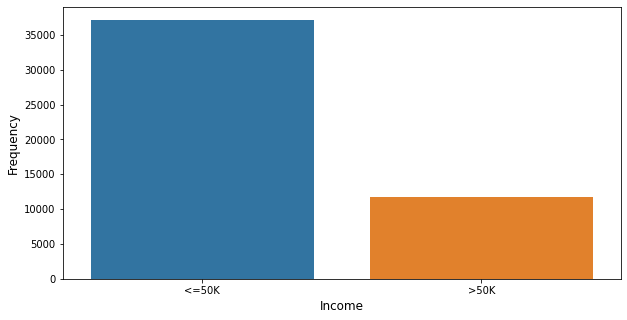

In [16]:
# Visualizing income variable, as saw above there are two income groups: <=50K, >50K
# Low/lower income: <=50K
# High/higher income: >50K
# The proportion of <= 50K group outnumber the >50K income group significantly

plt.figure(figsize =(10,5))
sns.countplot(x = 'income', data = census_df)
plt.xlabel("Income",fontsize = 12)
plt.ylabel("Frequency",fontsize = 12)

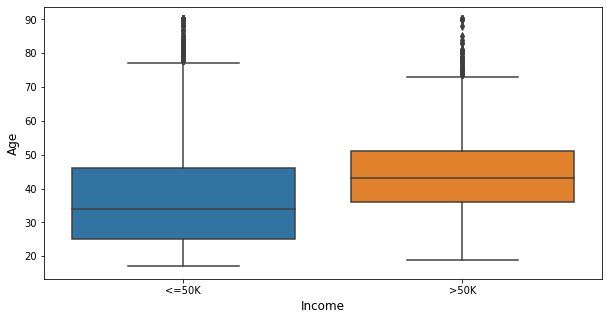

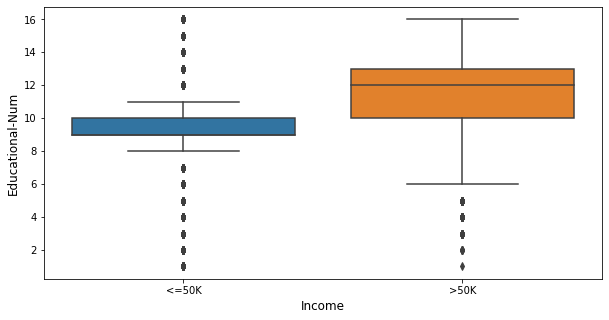

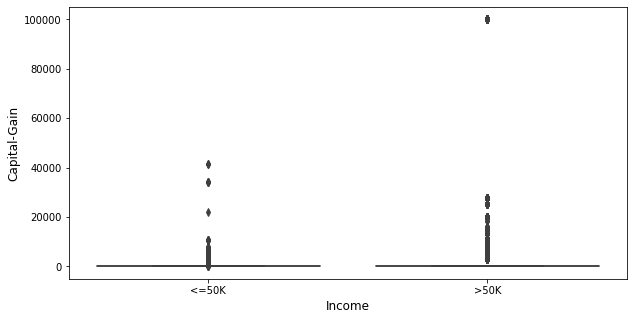

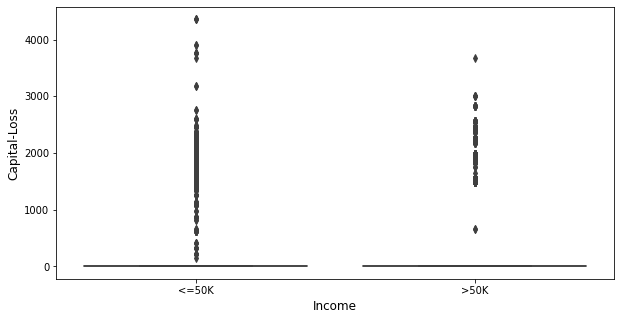

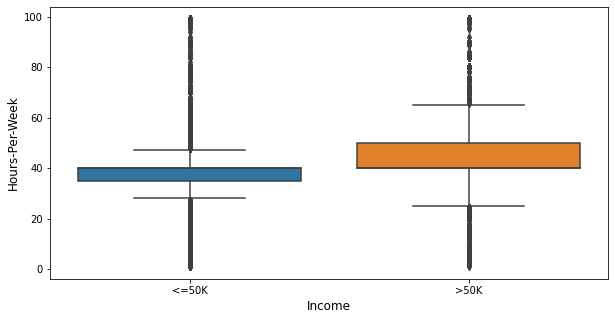

In [17]:
# AGE
# People with income <=50K are majorly age-group between 25-45
# People with income >50K are majorly age-group between 35-50
# There are some people above 70 who earn in range of both income groups

# EDUCATION
# People with educational years less than 11, are more likely to earn <=50K
# People with educational years 11 or more, are more likely to earn >50K

############## INSIGHT 1: People with higher education are likely to have high income, hence  #######
##### education is necessary for an individual to have high income & thus better life quality #######

# CAPITAL GAIN
# We know maximum value of capital gain is 99999 which is far above 75% quartile range
# Here, we see the outlier is for the people who have high earning

########## INSIGHT 2: Hence, people with high earning are more likely to have capital gains ##########

# CAPITAL LOSS
# It shows more data points for income <=50K
# People with low income are likely to have capital loss

# HOURS PER WEEK
# Majority of people work 40 hours per week
# People working more than 40 hours are likely to earn >50K

for col in list(numerical_cols.index):
    if (col != 'fnlwgt'):
        plt.figure(figsize =(10,5))
        sns.boxplot(y = col, x = 'income', data = census_df)
        plt.xlabel("Income",fontsize = 12)
        plt.ylabel(col.title(),fontsize = 12)

/home/saumyashree/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/saumyashree/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/saumyashree/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/

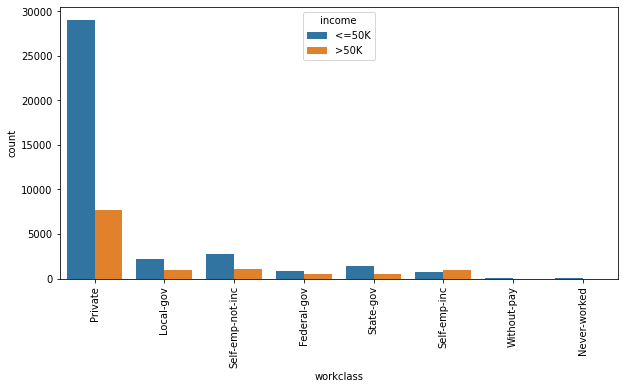

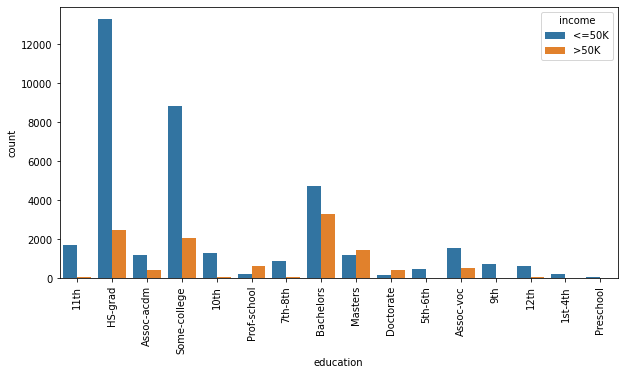

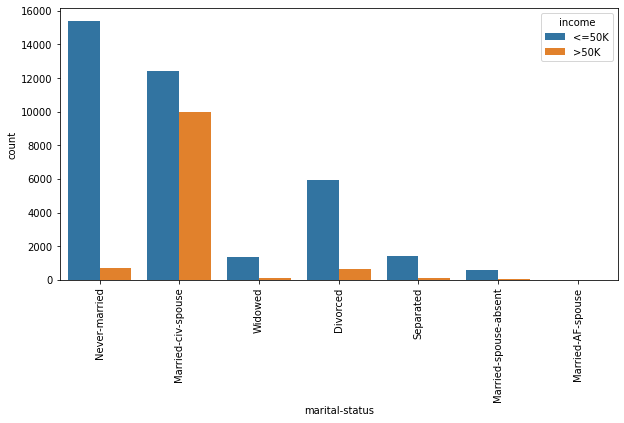

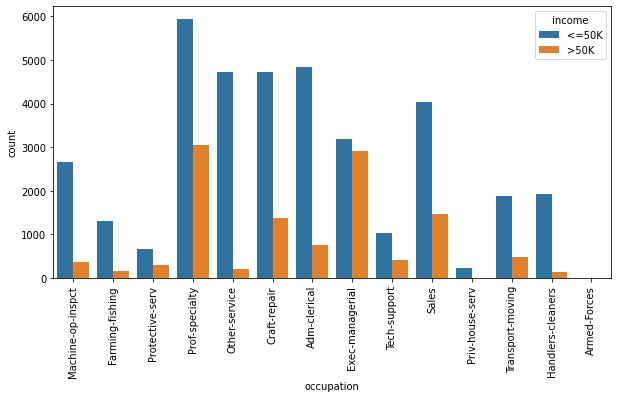

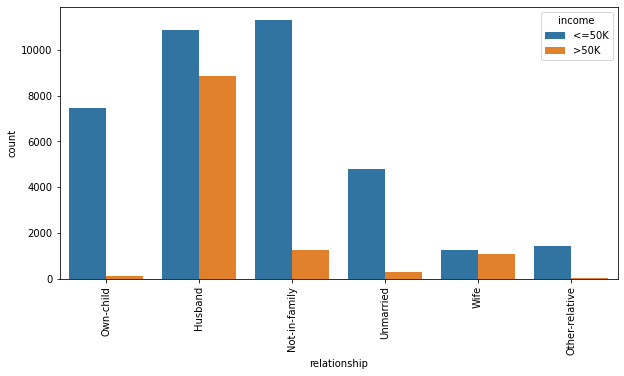

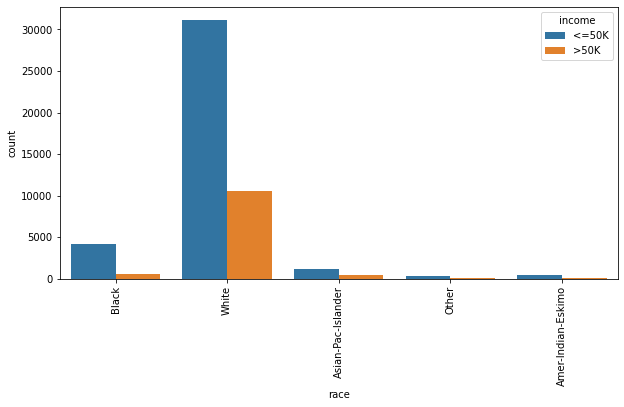

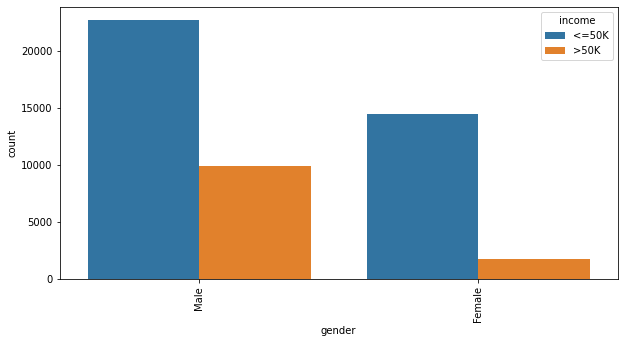

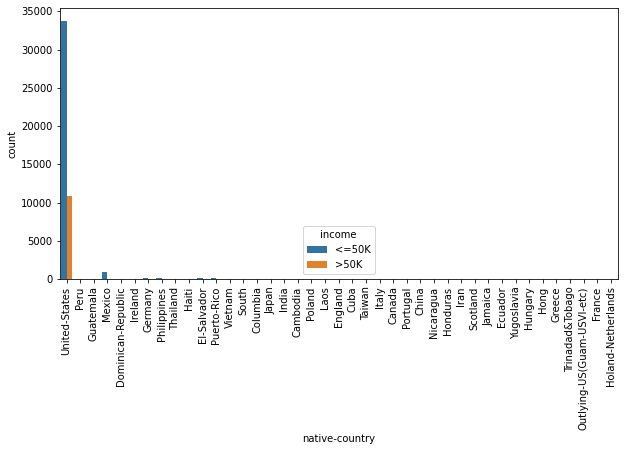

In [18]:
# WORKCLASS
# Individuals working in private companies compose majority of people that have income >50K
# Around 75% of people working in the Private Sector earn <=50K
# In all the workclass, except 'self-emp-inc', people with income <=50K outnumber the other income group

######## INSIGHT 3: Self employed people who handle their own business, ################
######## are more likely to earn better (if it gets successful!) #######################

# EDUCATION
# Education level of Bachelor degree, Masters, Doctorate, Prof-school are majority of people with income >50K

# MARITAL-STATUS
# The proportional difference between two income groups in Married-civ-spouse category is the least
# All other groups have significant difference between the two income groups

########### INSIGHT 4: People who are civilian and married are more likely to earn high income #########
########### This can be thought of from the motivation to earn more in order to support family #########

# OCCUPATION
# The occupation of professional speciality and executive managerial have relatively higher income (>50K)
# The proportional difference between two income groups for executive managerial is least

# RELATIONSHIP
# People who have single status earn income <=50K compared to people whose relationship status is married
# People who are wives are equally like to earn in both the income groups
 
# RACE
# Majority of data entries are composed of White people 
# Hence, White people make up for most of both income groups

# GENDER
# The proportional difference in two income groups is quite large for female compared to male

############# INSIGHT 5: There is a significant pay gap between males and females ####################

# NATIVE-COUNTRY
# Majority of people who were part of census are natives of USA
# The second largest nationality is Mexican

########### INSIGHT 6: From the statistics of race and native-country, it can be deduced ###################
########### that the census was carried out in the country of Uited States of Amaerica #####################

for col in list(categorical_cols.index):
    if (col != 'income'):
        plt.figure(figsize =(10,5))
        sns.countplot(census_df[col], hue = census_df['income'])
        plt.xticks(rotation=90)

In [19]:
# Displays the number of people in each educational level
census_df.loc[: , ['education' , 'educational-num']].value_counts()

education     educational-num
HS-grad       9                  15784
Some-college  10                 10878
Bachelors     13                  8025
Masters       14                  2657
Assoc-voc     11                  2061
11th          7                   1812
Assoc-acdm    12                  1601
10th          6                   1389
7th-8th       4                    955
Prof-school   15                   834
9th           5                    756
12th          8                    657
Doctorate     16                   594
5th-6th       3                    509
1st-4th       2                    247
Preschool     1                     83
dtype: int64

In [20]:
# There are 4035 individuals out of 48842 who have capital gains
census_df[census_df['capital-gain'] != 0].shape

(4035, 15)

In [21]:
# There are 2282 individuals out of 48842 who have loss in capital
census_df[census_df['capital-loss'] != 0].shape

(2282, 15)

In [22]:
# The individuals having capital gains and capital loss are different people
census_df[(census_df['capital-gain'] != 0) & (census_df['capital-loss'] != 0)].shape

(0, 15)

In [23]:
# There are 6317 individuals that have some gain or loss in capital, which is around 13% of the population
r, c = census_df[(census_df['capital-gain'] != 0) | (census_df['capital-loss'] != 0)].shape

print(f'There are {r} individuals that have some gain or loss in capital')

print(f'This figure is {math.ceil(r/census_df.shape[0] * 100)}% of the total sample size')

There are 6317 individuals that have some gain or loss in capital
This figure is 13% of the total sample size


In [24]:
# In order to plot correlation matrix, mapping income field to numerical value of 0 and 1
census_df['income'] = census_df['income'].map({'<=50K': 0, '>50K': 1})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


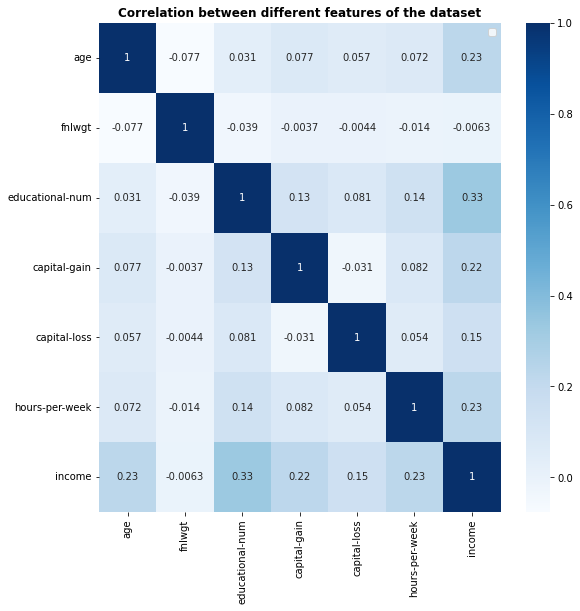

In [25]:
# Plotting correlation matrix
# Comparatively high correlation between income and age, education level, hours-per-week than other fields 

plt.figure(figsize = (9,9))
plt.title("Correlation between different features of the dataset", fontsize = 12, fontweight = 'bold')
sns.heatmap(census_df.corr(), cmap = 'Blues', annot = True)
plt.xticks(fontsize=10, rotation = 90)
plt.yticks(fontsize=10, rotation = 360)
plt.legend(fontsize=10)